In [2882]:
import cv2
import numpy as np
img=cv2.imread('C:/Users/Pranesh/Desktop/bubbles.png',0)
import math

In [2884]:
img=img[85:260,542:707]


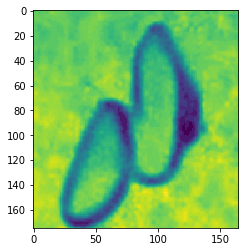

In [2885]:
imshow(img)

In [2930]:
cv2.imwrite('C:/Users/Pranesh/Desktop/part1.png',blank)

True

In [2886]:
img2=np.zeros([img.shape[0]+6,img.shape[1]+6],dtype=np.uint8)
img2[3:img2.shape[0]-3,3:img2.shape[1]-3]=img

In [2887]:
mid=np.mean(img)
mid_ar=np.ones(img.shape)*mid
diff=abs(img-mid_ar)
max_r=np.amax(diff,1)
min_r=np.amin(diff,1)
thresh=(max_r-min_r)//2+14
thresh=thresh.astype(np.uint8)
thresh2=np.zeros(img2.shape[0])
thresh2[3:img2.shape[0]-3]=thresh

In [2888]:
labeled=np.ones([img.shape[0],img.shape[1]],dtype=np.uint8)
label=1
label_back=255
d_fore=2
d_back=math.sqrt((img.shape[0]*img.shape[0]+img.shape[1]*img.shape[1]))
del_c=0
seed=[0,0]
for i in range(3,img2.shape[0]-3):
    for j in range(3,img.shape[1]-3):
        kernel=img2[i-3:i+4,j-3:j+4]
        del_c=np.mean(kernel)-7
        if img[i,j]>del_c:
            labeled[i,j]=255
        else:
            labeled[i,j]=0
        diff=thresh[i-3]
        mid=np.ones([7,7])*img[i,j]
        diff_ker=(kernel-mid)
        mid_ass=labeled[i,j]
        if mid_ass==0:
            diff=diff+21
        for k in range(-3,4):
            for k2 in range(-3,4):
                if labeled[i+k,j+k2]!=0:
                    
                    if diff_ker[k+3,k2+3]>thresh2[i+k]:
                        labeled[i+k,j+k2]=255-labeled[i,j]
                    elif diff_ker[k+3,k2+3]<=thresh2[i+k]:
                        labeled[i+k,j+k2]=labeled[i,j]
                    
                             
                
    

IndexError: index 175 is out of bounds for axis 0 with size 175

In [2889]:
med=cv2.medianBlur(labeled,3)
med=cv2.medianBlur(med,3)
med=cv2.medianBlur(med,3)



                   

In [2890]:
th3=255-med

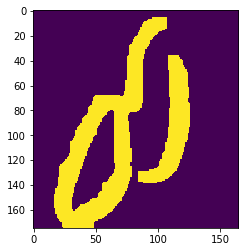

In [2928]:
imshow(opening)

In [2812]:
from matplotlib.pyplot import imshow

In [2892]:
kernel = np.ones((9,9),np.uint8)

opening = cv2.morphologyEx(th3, cv2.MORPH_OPEN, kernel)


In [2894]:
def neighbours(x,y,image):
    "Return 8-neighbours of image point P1(x,y), in a clockwise order"
    img = image
    x_1, y_1, x1, y1 = x-1, y-1, x+1, y+1
    return [ img[x_1][y], img[x_1][y1], img[x][y1], img[x1][y1],     # P2,P3,P4,P5
                img[x1][y], img[x1][y_1], img[x][y_1], img[x_1][y_1] ]    # P6,P7,P8,P9
def transitions(neighbours):
    "No. of 0,1 patterns (transitions from 0 to 1) in the ordered sequence"
    n = neighbours + neighbours[0:1]      # P2, P3, ... , P8, P9, P2
    return sum( (n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:]) )  # (P2,P3), (P3,P4), ... , (P8,P9), (P9,P2)


In [2895]:
Image_Thinned = opening.copy()//255  # deepcopy to protect the original image
changing1 = changing2 = 1   

#  the points to be removed (set as 0)
while changing1!=0 or changing2!=0:   #  iterates until no further changes occur in the image
        # Step 1
    changing1 = []
    rows, columns = Image_Thinned.shape               # x for rows, y for columns
    for x in range(1, rows - 1):                     # No. of  rows
        for y in range(1, columns - 1):            # No. of columns
            P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, Image_Thinned)
            if (Image_Thinned[x][y] == 1     and    # Condition 0: Point P1 in the object regions 
                2 <= sum(n) <= 6   and    # Condition 1: 2<= N(P1) <= 6
                transitions(n) == 1 and    # Condition 2: S(P1)=1  
                P2 * P4 * P6 == 0  and    # Condition 3   
                P4 * P6 * P8 == 0):         # Condition 4
                changing1.append((x,y))
    for x, y in changing1: 
        Image_Thinned[x][y] = 0
    # Step 2
    changing2 = []
    for x in range(1, rows - 1):
        for y in range(1, columns - 1):
            P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, Image_Thinned)
            if (Image_Thinned[x][y] == 1   and        # Condition 0
                2 <= sum(n) <= 6  and       # Condition 1
                transitions(n) == 1 and      # Condition 2
                P2 * P4 * P8 == 0 and       # Condition 3
                P2 * P6 * P8 == 0):            # Condition 4
                changing2.append((x,y))    
    for x, y in changing2: 
        Image_Thinned[x][y] = 0
    changing1=len(changing1)
    changing2=len(changing2)


In [2896]:
new_img=Image_Thinned*255

In [2897]:
new_img=new_img.astype(np.uint8)

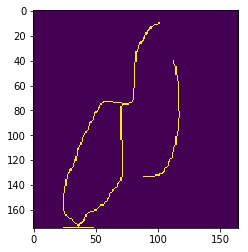

In [2898]:
imshow(new_img)

In [2902]:
new_img[0,:]=0
new_img[:,0]=0
new_img[new_img.shape[0]-1,:]=0
new_img[:,new_img.shape[1]-1]=0

In [2903]:
x_end=[]
y_end=[]
for i in range(1,new_img.shape[0]-1):
    for j in range(1,new_img.shape[1]-1):
         if new_img[i,j]==255:
                kernel=new_img[i-1:i+2,j-1:j+2]
                s=np.sum(kernel)//255
                if s==1:
                    new_img[i,j]=0
                if s==2:
                    x_end.append(i)
                    y_end.append(j)
                    
                
                 

In [2904]:
mark1=[0]*len(x_end)
marked_img=np.zeros(new_img.shape,dtype=np.uint8)
mark2=1
def branches(kernel,x,y):
    
    x_un,y_un=np.where(kernel==255)
    #print("a",x_un.shape,y_un.shape)
    x1=np.zeros([x_un.shape[0],x_un.shape[0]])
    y1=np.zeros([y_un.shape[0],y_un.shape[0]])
    x1[:,0]=x_un
    y1[:,0]=y_un
    x1[0,1:]=x_un[1:]
    y1[0,1:]=y_un[1:]
    branched=False
    #print(x1.shape,y1.shape)
    for j in range(1,x_un.shape[0]):
        res=np.zeros(x_un.shape[0]-1,dtype=int)
        res[:j]=x_un[:j]
        if j+1<x_un.shape[0]:
            print("z")
            res[j:]=x_un[j+1:]
       # print("b",res.shape,x1.shape,x1[j,1:].shape)
        x1[j,1:]=np.copy(res)
    
        res[:j]=y_un[:j]
        if j+1<y_un.shape[0]:
            res[j:]=y_un[j+1:]
        #print("c",res.shape)
        y1[j,1:]=res
    x1=abs(x1-x1[:,0])
    y1=abs(y1-y1[:,0])
    x1=x1[:,1:]
    y1=y1[:,1:]
    #print("d",x_un.shape,y_un.shape)
    for j in range(x1.shape[0]):
        for k in range(x1.shape[1]):
            if x1[j,k]==2 or y1[j,k]==2 or (x1[j,k]==1 and y1[j,k]==1):
                branched=True
                break
                      
    if branched:
        branches_x=[]
        branches_y=[]
        for j in range(x_un.shape[0]):
            if abs(x_un[j]-y_un[j])==1:
                branches_x.append(x_un[j]+x-1)
                branches_y.append(y_un[j]+y-1)
            elif abs(x_un[j]-y_un[j])==0 and x_un[j]==0 and kernel[x_un[j]+1,y_un[j]]!=255 and kernel[x_un[j],y_un[j]+1]!=255:
                branches_x.append(x_un[j]+x-1)
                branches_y.append(y_un[j]+y-1)
            elif abs(x_un[j]-y_un[j])==0 and x_un[j]==2 and kernel[x_un[j]-1,y_un[j]]!=255 and kernel[x_un[j],y_un[j]-1]!=255:
                branches_x.append(x_un[j]+x-1)
                branches_y.append(y_un[j]+y-1)
            elif abs(x_un[j]-y_un[j])==2 and x_un[j]==2 and kernel[x_un[j]-1,y_un[j]]!=255 and kernel[x_un[j],y_un[j]+1]!=255:
                branches_x.append(x_un[j]+x-1)
                branches_y.append(y_un[j]+y-1)
            elif abs(x_un[j]-y_un[j])==2 and x_un[j]==0 and kernel[x_un[j]+1,y_un[j]]!=255 and kernel[x_un[j],y_un[j]-1]!=255:
                branches_x.append(x_un[j]+x-1)
                branches_y.append(y_un[j]+y-1)
                
                
        return True,branches_x,branches_y
    else:
        diff=abs(x_un-y_un)
        t=np.where(diff==1)
        x_next=x_un[t]
        y_next=y_un[t]

        return False,x_next,y_next   
def which_branch(x_br,y_br,x,y,new_img,marked_img,mark1,length2,last_branch):                    
    m_img=marked_img
    n_img=new_img
    this_branch_length=length2
    
    print(mark1)
    temp_mark=mark1
    length=[]
    branches=[]
    branches.append(last_branch)
    length.append(length2)
    for i in range(len(x)):
        x_s=x[i]
        y_s=y[i]
        m_img[x_s,y_s]=temp_mark
        m_img,l,branch_points=branch_mark(x_s,y_s,n_img,m_img,temp_mark)
        branches.append(branch_points)        
        length.append(l)
        
    ir=len(length)
    s_r=length.index(max(length))
    for i in range(2,ir):
        s_d=length.index(max(length))
        s_b=length.index(min(length))

        point=branches[s_b]
        x_s=point[0]
        y_s=point[1]
        for j in range(len(x_s)):
            if x_s[j]!=x_br or y_s[j]!=y_br:
                n_img[x_s[j],y_s[j]]=0
                m_img[x_s[j],y_s[j]]=0
        branches.remove(branches[s_b])
        #print(length)
        length.remove(length[s_b])
    s_g=length.index(max(length))   
    last_x=0
    last_y=0
    if s_r==0:           
        the_branch=branches[1]
        last_x=the_branch[0][-1]
        last_y=the_branch[1][-1]
    else:
        the_branch=branches[s_g]
        last_x=the_branch[0][-1]
        last_y=the_branch[1][-1]

    return n_img,m_img,last_x,last_y
def branch_mark(x_1,y_1,new_img,marked_img,mark1):
    x=x_1
    y=y_1
    length=0
    n_img=new_img
    m_img=marked_img
    m_img[x,y]=mark1
    end_point=0
    x_branches=[]
    y_branches=[]
    x_branches.append(x)
    y_branches.append(y)
    while end_point!=1:
        
        kern=(n_img[x-1:x+2,y-1:y+2])
        marked_kernel=(m_img[x-1:x+2,y-1:y+2])//mark1
        
       # print(kern)
        #print(marked_kernel)
    
        kern=kern-(marked_kernel*255)
        #print(kern)
        s=np.sum(kern)//255
        if s==1:
            
            x_next,y_next=np.where(kern==255)
            x_m=x+x_next[0]-1
            y_m=y+y_next[0]-1
            m_img[x_m,y_m]=mark1
            length+=1
            x=x_m
            y=y_m
            x_branches.append(x)
            y_branches.append(y)
            
        elif s>=2:
            b,x_b,y_b=branches(kern,x,y)
            
            if b==False:
                x_next=x_b[0]
                y_next=y_b[0]
                m_img[x_next+x-1,y+y_next-1]=mark1
                length+=1
                x=x_next+x-1
                y=y_next+y-1
                x_branches.append(x)
                y_branches.append(y)
            else:
                n_img,m_img,x_next,y_next=which_branch(x,y,x_b,y_b,n_img,m_img,mark1,length,[x_branches,y_branches])
                x=x_next
                y=y_next
                x_branches.append(x)
                y_branches.append(y)
        if s==0:
            
            end_point=1
            
            
    return m_img,length,[x_branches,y_branches]            

def mark(x_1,y_1,new_img,marked_img,mark1):
    x=x_1
    y=y_1
    #print(mark1)
    length=0
    n_img=new_img
    m_img=marked_img
    m_img[x,y]=mark1
    end_point=0
    x_branch=[]
    y_branch=[]
    x_branch.append(x)
    y_branch.append(y)
    while end_point!=1:
        
        kern=(n_img[x-1:x+2,y-1:y+2])
       # print(m_img[x-1:x+2,y-1:y+2])
        marked_kernel=(m_img[x-1:x+2,y-1:y+2])//mark1
        
        #print(kern)
        #print(marked_kernel)
        kern=kern-(marked_kernel*255)
        #print(kern)
        s=np.sum(kern)//255
        if s==1:
            
            x_next,y_next=np.where(kern==255)
            x_m=x+x_next[0]-1
            y_m=y+y_next[0]-1
            m_img[x_m,y_m]=mark1
            length+=1
            x=x_m
            y=y_m
            x_branch.append(x)
            y_branch.append(y)
        elif s>=2:
            b,x_b,y_b=branches(kern,x,y)
            
            if b==False:
                x_next=x_b[0]
                y_next=y_b[0]
                m_img[x_next+x-1,y+y_next-1]=mark1
                length+=1
                x=x_next+x-1
                y=y_next+y-1
                x_branch.append(x)
                y_branch.append(y)
            else:
                #print("branch")
                n_img,m_img,x_next,y_next=which_branch(x,y,x_b,y_b,n_img,m_img,mark1,length,[x_branch,y_branch])
                x=x_next
                y=y_next
        if s==0:
            end_point=1
            
            
    return n_img,m_img,length,x,y            



In [2905]:
iterq=0
for i in range(len(x_end)):
    if mark1[i]==0:
        x=x_end[i]
        y=y_end[i]
        marked_img[x,y]=mark2
        mark1[i]=mark2
        new_img,marked_img,length,x_l,y_l=mark(int(x),int(y),new_img,marked_img,mark2)
        for j in range(len(x_end)):
            p=x_end[j]
            if p==x_l and y_end[j]==y_l:
                break
        mark1[j]=mark2
        mark2+=1
        iterq+=1       
    

1
z
1
z
1


In [2906]:
x_marked=[]
y_marked=[]
for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
        if marked_img[i,j]!=0:
            x_marked.append(i)
            y_marked.append(j)

In [2907]:
mark2

3

In [2908]:
all_length=np.zeros((mark2,1),dtype=int)

for i in range(1,mark2+1):
    length=0
    x=[]
    y=[]
    for j in range(len(x_marked)):
        if marked_img[x_marked[j],y_marked[j]]==i:
            length+=1
            x.append(x_marked[j])
            y.append(y_marked[j])
    all_length[i-1]=length
    if length<=5:
        for j in range(len(x)):
            new_img[x[j],y[j]]=0
            marked_img[x[j],y[j]]=0
        all_length[i-1]=0
               
        

In [2826]:
all_length.shape

(256, 1)

In [2909]:
points=np.zeros((mark2,4))
for j in range(1,mark2+1):
    c=0
    for i in range(len(x_end)):
        if mark1[i]==j and c==0:
            points[j-1,0]=x_end[i]
            points[j-1,1]=y_end[i]
            c=1
        elif mark1[i]==j and c==1:
            points[j-1,2]=x_end[i]
            points[j-1,3]=y_end[i]

In [2910]:
difference=points[:,0:2]-points[:,2:]

In [2911]:
squared=difference*difference

In [2912]:
sq_sum=np.sum(squared,1)

In [2913]:
point_dist=np.sqrt(sq_sum)

In [2914]:
closed=np.zeros((mark2,1))
for i in range(point_dist.shape[0]):
    if all_length[i]!=0 and point_dist[i]!=0:
        r=all_length[i]/point_dist[i]
        if r>=2.:
            closed[i]=5
        else:
            closed[i]=1

In [2915]:
len(x_marked)

430

In [2916]:
all_marked_cat=[]
for j in range(1,mark2+1):
    x=[]
    y=[]
    for i in range(len(x_marked)):
         if marked_img[x_marked[i],y_marked[i]]==j:
                x.append(x_marked[i])
                y.append(y_marked[i])
    all_marked_cat.append([x,y])

In [2917]:
minimum=10000
for i in range(all_length.shape[0]):
    if all_length[i]<minimum and all_length[i]!=0:
        minimum=all_length[i]
minimum=minimum[0]

In [2918]:
minimum

111

In [2919]:
compressed_img=np.zeros(new_img.shape,dtype=np.uint8)
marked_comprsd=np.zeros(new_img.shape,dtype=np.uint8)
for i in range(1,mark2+1):
    if all_length[i-1]!=0:
        p1=points[i-1,0:2]
        p2=points[i-1,2:]
        compressed_img[int(p1[0]),int(p1[1])]=255
        compressed_img[int(p2[0]),int(p2[1])]=255
        marked_img[int(p1[0]),int(p1[1])]=i
        marked_img[int(p2[0]),int(p2[1])]=1

In [2920]:
for i in range(1,mark2+1):
    l=len(all_marked_cat[i-1][0])
    x=all_marked_cat[i-1][0]
    y=all_marked_cat[i-1][1]
    if len(x)>0 and all_length[i-1]!=0:
        skip=len(x)//minimum
        count=0
        for j in range(0,len(x),skip):
            if count<minimum:
                count+=1
                compressed_img[x[j],y[j]]=255
                marked_comprsd[x[j],y[j]]=i
            
            

In [2921]:
marked_x=[]
marked_y=[]
for i in range(compressed_img.shape[0]):
    for j in range(compressed_img.shape[1]):
        if marked_comprsd[i,j]!=0:
            marked_x.append(i)
            marked_y.append(j)
            

In [2922]:
all_marked_com=[]
for j in range(1,mark2+1):
    x=[]
    y=[]
    for i in range(len(marked_x)):
         if marked_comprsd[marked_x[i],marked_y[i]]==j:
                x.append(marked_x[i])
                y.append(marked_y[i])
    all_marked_com.append([x,y])

In [2923]:
all_marked_com

[[[10,
   11,
   11,
   13,
   14,
   15,
   16,
   17,
   18,
   20,
   22,
   23,
   24,
   25,
   26,
   28,
   30,
   32,
   33,
   35,
   37,
   39,
   41,
   43,
   45,
   47,
   49,
   51,
   53,
   55,
   57,
   59,
   61,
   63,
   65,
   67,
   69,
   71,
   73,
   73,
   73,
   73,
   73,
   74,
   74,
   74,
   74,
   74,
   75,
   75,
   75,
   75,
   77,
   78,
   78,
   79,
   80,
   81,
   82,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111,
   111,
   112,
   113,
   114,
   115,
   116,
   117,
   118,
   119,
   120,
   121,
   122,
   123,
   124,
   125,
   126,
   127,
   128,
   128,
   129,
   130,
   131],
  [100,
   97,
   99,
   94,
   93,
   92,
   91,
   91,
   91,
   89,
   88,
   88,
   88,
   87,
   86,
   84,
   84,
   83,
   83,
   82,
   82,
   82,
   82,
   81,
   81,
   81,
   81

In [2924]:
theta_all=np.zeros([len(all_marked_com),1])
theta=0.0
the_min=np.zeros([len(all_marked_com),2])
for i in range(points.shape[0]):
    if all_length[i]!=0:
        x1=points[i,0]
        y1=points[i,1]
        x2=points[i,2]
        y2=points[i,3]
        
        if y2!=y1:
            m=(x2-x1)/(y2-y1)
            theta=math.atan(m)
        else:
            theta=math.radians(np.sign(x2-x1)*90)
        theta_all[i]=theta   
    

In [2925]:
len(all_marked_com)

3

In [2927]:
blank=np.zeros(new_img.shape,dtype=np.uint8)

x=all_marked_com[0][0]
y=all_marked_com[0][1]
if len(x)!=0:
    for j in range(len(x)):
        blank[x[j],y[j]]=255
            
            

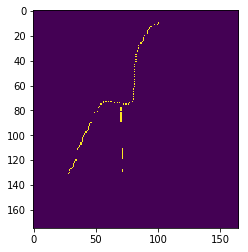

In [2931]:
imshow(blank)

In [2844]:
all_marked_com_local=[]
for i in range(len(all_marked_com)):
    x=all_marked_com[i][0]
    y=all_marked_com[i][1]
    x_l=[]
    y_l=[]
    
    for j in range(len(x)):
        xl=(x[j]-points[i,0])*math.cos(theta_all[i])-(y[j]-points[i,1])*math.sin(theta_all[i])
        yl=(x[j]-points[i,0])*math.sin(theta_all[i])+(y[j]-points[i,1])*math.cos(theta_all[i])
        x_l.append(int(xl))
        y_l.append(int(yl))
    all_marked_com_local.append([x_l,y_l])

In [2845]:
all_sum=np.zeros((len(all_marked_com_local),1))
for i in range(len(all_marked_com_local)):
    s=sum(all_marked_com_local[i][0])
    all_sum[i]=s

In [2846]:
all_sign=np.sign(all_sum)

In [2847]:
all_degrees=np.abs(np.degrees(theta_all))

In [2848]:
for i in range(1,mark2+1):
    if closed[i-1]==1:
        x_ref=all_marked_com[i-1][0]
        y_ref=all_marked_com[i-1][1]
        if len(x_ref)>0 and all_length[i-1]!=0:
            x1=points[i-1,0]
            y1=points[i-1,1]
            x2=points[i-1,2]
            y2=points[i-1,3]
            sign1=all_sign[i-1]
            for j in range(1,mark2+1):
                if i!=j and closed[j-1]==1 and all_length[j-1]!=0:
                    a1=points[j-1,0]
                    b1=points[j-1,1]
                    a2=points[j-1,2]
                    b2=points[j-1,3]
                    sign2=all_sign[j-1]
                    d1=math.sqrt((a1-x1)**2+(b1-y1)**2)
                    d2=math.sqrt((a2-x2)**2+(b2-y2)**2)
                    k=-1
                    if d1<all_length[i-1] and d2<all_length[i-1]:
                        if np.sign(theta_all[i-1])==np.sign(theta_all[j-1]) and sign1==(-sign2):
                            k=1
                        elif np.sign(theta_all[i-1])!=np.sign(theta_all[j-1]) and sign1==sign2:
                            if all_degrees[i-1]<=45:
                                if min(b1,b2)<min(y1,y2) and sign1>0:
                                    k=1
                                elif max(b1,b2)>max(y1,y2) and sign1<0:
                                    k=1
                            elif all_degrees[i-1]>45:
                                if max(a1,a2)>max(x1,x2) and sign1>0:
                                    k=1
                                elif min(a1,a2)<min(x1,x2) and sign1<0:
                                    k=1
                        elif np.sign(theta_all[i-1])!=np.sign(theta_all[j-1]) and sign1==(-sign2):
                            if all_degrees[i-1]<=45:
                                if max(b1,b2)>max(y1,y2) and sign1>0:
                                    k=1
                                elif min(b1,b2)<min(y1,y2) and sign1<0:
                                    k=1
                            elif all_degrees[i-1]>45:
                                if min(a1,a2)<min(x1,x2) and sign1>0:
                                    k=1
                                elif max(a1,a2)>max(x1,x2) and sign1<0:
                                    k=1
                    if k==1:
                        x=all_marked_com[j-1][0]
                        y=all_marked_com[j-1][1]
                        for z in range(len(x)):
                            marked_comprsd[x[z],y[z]]=i
                            all_marked_com[j-1]=[[],[]]
                        
                        
                    
        

In [2849]:
len(all_marked_com)

256

In [2850]:
x_marked=[]
y_marked=[]
for i in range(marked_comprsd.shape[0]):
    for j in range(marked_comprsd.shape[1]):
        if marked_comprsd[i,j]!=0:
            x_marked.append(i)
            y_marked.append(j)

In [2851]:
all_marked_reg=[]
for i in range(1,mark2+1):
    x=[]
    y=[]
    for j in range(len(x_marked)):
        if marked_comprsd[x_marked[j],y_marked[j]]==i:
            x.append(x_marked[j])
            y.append(y_marked[j])
    all_marked_reg.append([x,y])

In [2852]:
len(all_marked_reg)

256

In [2853]:
d=[]
blank=np.ones(new_img.shape,dtype=np.uint8)*255
for i in range(len(all_marked_reg)):
    x=all_marked_reg[i][0]
    y=all_marked_reg[i][1]
    if len(x)>=5:
        coord=np.zeros((len(x),2),dtype='float32')
        coord[:,0]=y
        coord[:,1]=x
        ellipse=cv2.fitEllipse(coord)
        d.append(ellipse)
        
        

In [2854]:
area=[]
perimeter=[]
for i in d:
    a=3.14*i[1][0]*i[1][1]/4.
    p=2*3.14*math.sqrt((i[1][0]*i[1][0]+i[1][1]*i[1][1])/8)
    area.append(a)
    perimeter.append(p)

In [2855]:
r=[]
for i in range(len(area)):
    r1=(area[i]/perimeter[i])
    r.append(r1)

In [2865]:
t=max(r)//20

In [2866]:
number=[]
upt=[0]
upper=0
lower=0
for i in range(20):
    upper=upper+t
    
    count=0
    for j in r:
        if j<=upper and j>lower:
            count+=1
    upt.append(upper/13)
    number.append(count)
    lower=upper
for j in r:
    count=0
    if j>=upper:
        count+=1
number.append(count)


In [2867]:
import matplotlib.pyplot as plt


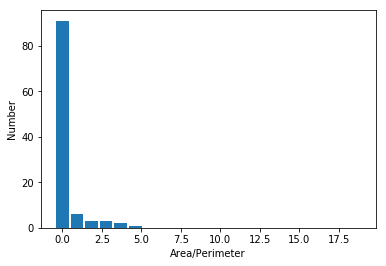

In [2868]:

plt.bar(upt, number)
plt.xlabel('Area/Perimeter')
plt.ylabel('Number')

plt.savefig('C:/Users/Pranesh/Desktop/FinalYearProject/Graphs/3110.png')



In [1997]:
import numpy
numpy.set_printoptions(threshold=numpy.nan)
v_f=np.zeros((10,2))

In [ ]:
[.25,.446,.566,.633,.737,1.03,1.2,1.4,2.15,3.11]

In [2869]:
void_area=sum(area)

In [2870]:
void_area

8732818.615845699

In [2871]:
total_area=new_img.shape[0]*new_img.shape[1]

In [2872]:
total_area

717093

In [2875]:
void_fraction=void_area/total_area

In [2876]:
v_f[9,0]=void_fraction

In [2742]:
upt

[0,
 0.6153846153846154,
 1.2307692307692308,
 1.8461538461538463,
 2.4615384615384617,
 3.076923076923077]

In [2880]:
v_f[:,1]

array([0.15394829, 0.24960863, 0.56398295, 0.50079331, 1.0969568 ,
       2.94701503, 0.54513604, 0.        , 0.        , 0.        ])

In [2881]:
v_f[:,0]

array([ 0.05303248,  0.37800926,  0.07139064,  0.42229807,  1.46322589,
        2.94701503,  0.54513604,  0.37986929,  0.58855486, 12.17808376])